# Mobile Price Prediction using Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mobile_df = pd.read_csv(r"https://raw.githubusercontent.com/ArchanaInsights/Datasets/main/mobile_price.csv")
mobile_df.head()

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,203,2357,10,135.0,5.2,424,8,1.35,16.0,3.000,13.00,8.0,2610,7.4
1,880,1749,10,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9
2,40,1916,10,110.0,4.7,312,4,1.20,8.0,1.500,13.00,5.0,2000,7.6
3,99,1315,11,118.5,4.0,233,2,1.30,4.0,0.512,3.15,0.0,1400,11.0
4,880,1749,11,125.0,4.0,233,2,1.30,4.0,1.000,3.15,0.0,1700,9.9


# Machine Learning Model Building Steps:-

## 1.	Explore the Dataset:

## Step 1.1
 - **Understand the Data:** Begin by getting an overview of the dataset. Check the type and amount of data available, and understand the structure of the dataset.

In [3]:
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161 entries, 0 to 160
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Product_id    161 non-null    int64  
 1   Price         161 non-null    int64  
 2   Sale          161 non-null    int64  
 3   weight        161 non-null    float64
 4   resoloution   161 non-null    float64
 5   ppi           161 non-null    int64  
 6   cpu core      161 non-null    int64  
 7   cpu freq      161 non-null    float64
 8   internal mem  161 non-null    float64
 9   ram           161 non-null    float64
 10  RearCam       161 non-null    float64
 11  Front_Cam     161 non-null    float64
 12  battery       161 non-null    int64  
 13  thickness     161 non-null    float64
dtypes: float64(8), int64(6)
memory usage: 17.7 KB


In [4]:
mobile_df.isna().sum()

Product_id      0
Price           0
Sale            0
weight          0
resoloution     0
ppi             0
cpu core        0
cpu freq        0
internal mem    0
ram             0
RearCam         0
Front_Cam       0
battery         0
thickness       0
dtype: int64

In [5]:
mobile_df.shape

(161, 14)

# Step 1.2.	
- **Examine Statistical Summary:** Look at basic statistics of the dataset to understand the distribution of features.

In [6]:
mobile_df.describe().round(2)

,Product_id,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.00,161.0,161.00,161.00,161.00,161.00,161.00
mean,675.56,2215.60,621.47,170.43,5.21,335.06,4.86,1.50,24.5,2.20,10.38,4.50,2842.11,8.92
std,410.85,768.19,1546.62,92.89,1.51,134.83,2.44,0.60,28.8,1.61,6.18,4.34,1366.99,2.19
min,10.00,614.00,10.00,66.00,1.40,121.00,0.00,0.00,0.0,0.00,0.00,0.00,800.00,5.10
25%,237.00,1734.00,37.00,134.10,4.80,233.00,4.00,1.20,8.0,1.00,5.00,0.00,2040.00,7.60
50%,774.00,2258.00,106.00,153.00,5.15,294.00,4.00,1.40,16.0,2.00,12.00,5.00,2800.00,8.40
75%,1026.00,2744.00,382.00,170.00,5.50,428.00,8.00,1.88,32.0,3.00,16.00,8.00,3240.00,9.80
max,1339.00,4361.00,9807.00,753.00,12.20,806.00,8.00,2.70,128.0,6.00,23.00,20.00,9500.00,18.50


# Step 1.3.	
 - **Correlation Analysis:** Create a heatmap to visualize the correlation matrix. Focus on the relationship between the features and the target variable 'Price'.

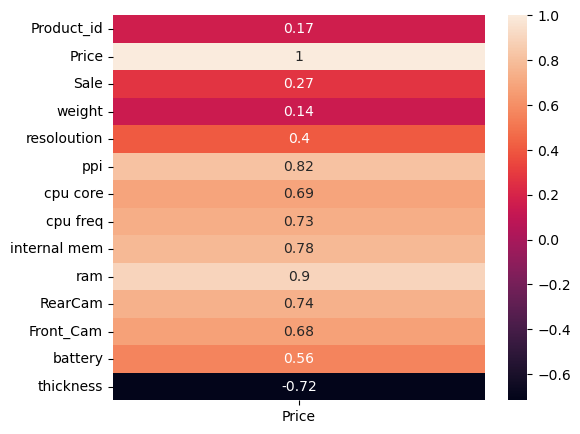

In [7]:
Corr_P = mobile_df.corr()[["Price"]]
plt.figure(figsize=(6,5))
sns.heatmap(Corr_P,annot=True)
plt.show()

**Highly Correlated features are Ram,Ppi,RearCam and internal memory**

Top Features : 
ram             0.896915
ppi             0.817614
internal mem    0.776738
RearCam         0.739538
Name: Price, dtype: float64


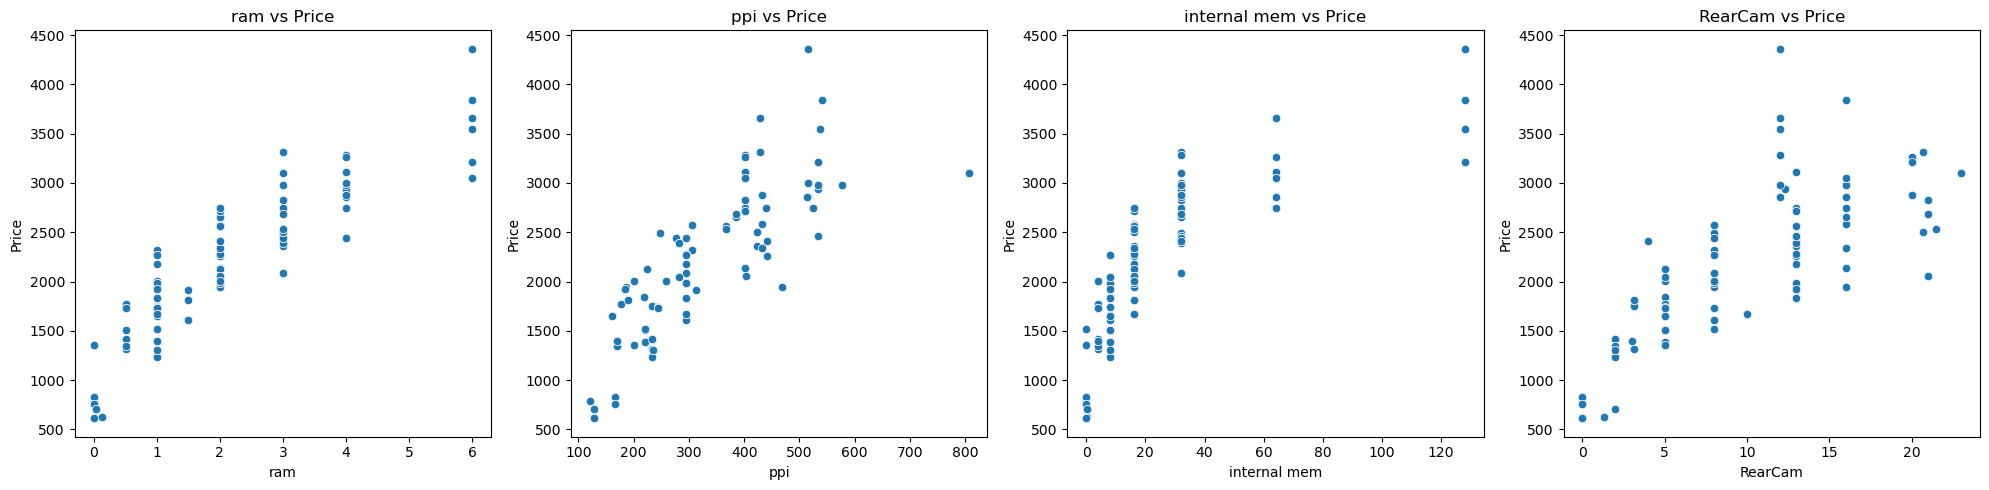

In [8]:
# Calculate correlation with target variable 'Price'
corr = mobile_df.corr()["Price"].sort_values(ascending=False)
top_feature = corr[1:5]
print(f"Top Features : \n{top_feature}")

fig,axes = plt.subplots(1, 4, figsize=(20, 5))
for i, feature in enumerate(top_feature.index):
    sns.scatterplot(data=mobile_df,x=mobile_df[feature], y=mobile_df['Price'], ax=axes[i])
    axes[i].set_title(f"{feature} vs Price")
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("Price")

plt.tight_layout()
plt.show()

# 2.Prepare the Data:

# Step 2.1
- Feature Selection: Select the features and the target variable for your analysis.

**Target Variable For my analysis  - PRICE**       
**We will select Featuers Using SelectKbest or Correlation matrix** 

# Manuallly select feature Using Correlation Matrix

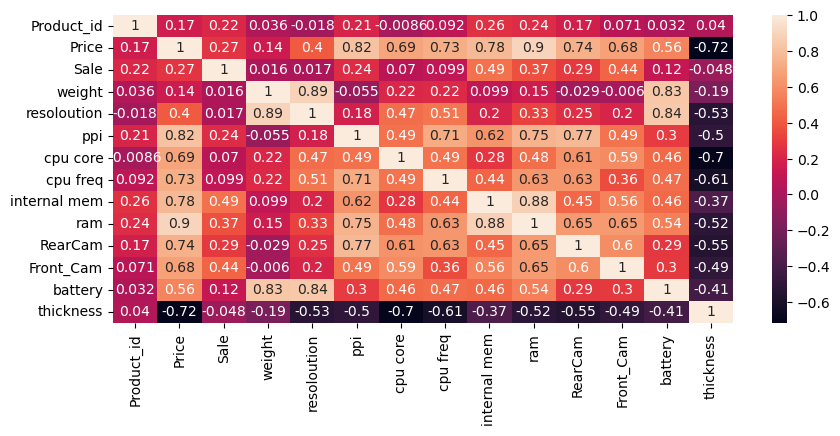

In [9]:
cor_df = mobile_df.corr()
plt.figure(figsize=(10,4))
sns.heatmap(cor_df,annot=True)
plt.show()

- In the future selection proccessing, top 4 features are Ram,Ppi,internal mem, Rearcam.
- but the correlation range between (ram and internal mem) and (Ppi and Rearcam) is highly co-related, so we can choose any one of the featurs from this pair.
- **To improve the model's performance,we can select the next two best features: cpu_freq and cpu_core**

# Using SelectKBest Method to find Best Featurs

In [10]:
mobile_df.columns

Index(['Product_id', 'Price', 'Sale', 'weight', 'resoloution', 'ppi',
       'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam',
       'battery', 'thickness'],
      dtype='object')

In [11]:
# Select Input and Output/target Variables
X = mobile_df.drop("Price",axis=1)
y = mobile_df["Price"]

- The data set condains Numerical data so use f_regression (when the target value is numerical)

In [12]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression,k=10)
X_Best_Features=selector.fit_transform(X,y) # find Top Feature

# Get Top Features Names
selected_feature =  X.columns[selector.get_support()]
selected_feature

Index(['resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram',
       'RearCam', 'Front_Cam', 'battery', 'thickness'],
      dtype='object')

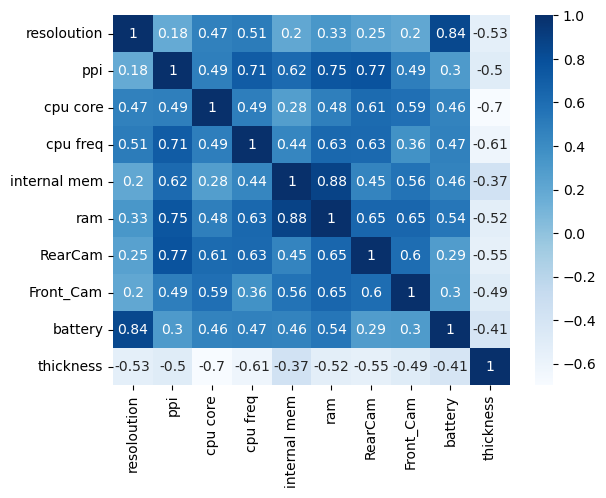

In [13]:
s_c=X[selected_feature].corr()
sns.heatmap(s_c,annot=True,cmap="Blues")
plt.show()

**look like the Ram and Internal memory is highly correlated. it means,its may be affecting the prediction or overfitting**  
**So remove Internal memory in this feature selction**

In [14]:
X = pd.DataFrame(X_Best_Features,columns=selected_feature) # Select Top Feature in X Variable for Training dataset
X.drop(["internal mem"],axis=1,inplace=True) # Remove highly Correlated feature 
X.head()

,resoloution,ppi,cpu core,cpu freq,ram,RearCam,Front_Cam,battery,thickness
0,5.2,424.0,8.0,1.35,3.000,13.00,8.0,2610.0,7.4
1,4.0,233.0,2.0,1.30,1.000,3.15,0.0,1700.0,9.9
2,4.7,312.0,4.0,1.20,1.500,13.00,5.0,2000.0,7.6
3,4.0,233.0,2.0,1.30,0.512,3.15,0.0,1400.0,11.0
4,4.0,233.0,2.0,1.30,1.000,3.15,0.0,1700.0,9.9


# Step 2.2.	
- Split the Dataset: Divide the dataset into training and testing sets. Use 80% of the data for training and 20% for testing.

In [15]:
# split the data for Models performing
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=45)

print("Orginal Dataset Shape: ",mobile_df.shape)
print("X_train Shape: ",X_train.shape)
print("X_test Shape: ",X_test.shape)
print("y_train Shape: ",y_train.shape)
print("y_test Shape: ",y_test.shape)

Orginal Dataset Shape:  (161, 14)
X_train Shape:  (128, 9)
X_test Shape:  (33, 9)
y_train Shape:  (128,)
y_test Shape:  (33,)


# 3.Build and Train the Model:
# Step 3.1.	& 3.2.
- Create a Linear Regression Model: Build a linear regression model using the training data.
- Train the Model: Fit the model to the training data.


In [16]:
from sklearn.linear_model import LinearRegression

#Create a Linear Regression Mode
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train,y_train)

LinearRegression()

# 4.Evaluate the Model:
## Step 4.1:
- Predict: Use the model to make predictions on the test set.

In [17]:
X_test.head(1) # Model can"t access Xtest Value

,resoloution,ppi,cpu core,cpu freq,ram,RearCam,Front_Cam,battery,thickness
38,5.5,178.0,4.0,1.3,0.512,5.0,0.0,2250.0,9.2


In [18]:
#y_pred = m1*ppi+m2*cpu freq+m3*ram+m4*RearCam+c
y_pred = model.predict(X_test)
y_pred

array([1462.65349431, 2754.13188951, 2309.35514147, 1501.31457125,
       2807.34312118, 1324.95894416, 2807.34312118, 2224.58345728,
       3064.48040023, 2641.14501236, 2916.45578479, 3150.7741033 ,
       2931.38761592,  809.83337135, 2256.4517972 , 1714.46811797,
        892.50019412, 2667.93373736, 3303.46792426,  397.43463098,
       2720.11544625, 2324.25046742, 4067.01213698, 1453.45628413,
       1678.35193118, 2894.89279861, 1835.448319  , 1624.83808316,
       2654.24552024, 1369.78590152, 3051.10622002, 1553.05401026,
       2484.99674053])

In [19]:
y_test

38     1777
0      2357
72     2044
119    1734
61     2746
3      1315
66     2746
134    2266
82     3005
35     2654
44     2859
114    2880
10     2438
149     614
40     2124
145    1921
101     833
128    2491
146    3102
141     628
64     2685
76     2571
152    4361
102    1522
28     1390
115    2858
29     1950
84     1646
129    2466
34     1421
137    3116
4      1749
135    2445
Name: Price, dtype: int64

## Step 4.2.	
- Metrics Calculation: Evaluate the model’s performance using the following metrics
- ➢	Slope (Coefficient) and Intercept: Print the slope (coefficient) and intercept of the regression line.

In [20]:
# m - Weight or slope
Slope = model.coef_ 
# c - y intercept or bias
Intercept = model.intercept_

print ("Coeffient Value : ",Slope)
print("Intercept Value : ",Intercept)

Coeffient Value :  [-1.08291892e+02  1.28162737e+00  5.05499147e+01  9.39019163e+01
  1.92019662e+02 -4.85895974e-01  7.68275687e+00  1.40663342e-01
 -8.38095169e+01]
Intercept Value :  1864.5275243299477


## Step 4.3
- **Model Performance Metrics:** Calculate and report the following metrics:
- ★	R² Score:
- ★	Mean Absolute Error (MAE):
- ★	Mean Squared Error (MSE): 

In [21]:
from sklearn.metrics import r2_score , mean_squared_error , mean_absolute_error

R2_score=r2_score(y_test,y_pred)
MAE = mean_absolute_error(y_test,y_pred)
MSE = mean_squared_error(y_test,y_pred)

print("R2_Score For the Model : ",R2_score)
print("Mean Absolute Error for the Model : ",MAE)
print("Mean Squared Error for The Model : ",MSE)
print("Value of SQRT Of the MSE :",np.sqrt(MSE))

R2_Score For the Model :  0.9369297633227581
Mean Absolute Error for the Model :  155.34754170300604
Mean Squared Error for The Model :  38633.68529145467
Value of SQRT Of the MSE : 196.55453515870516


# 5.Conclude the Analysis:

## Step 5.1
- 5.1.	Model Evaluation: Based on the performance metrics, assess how well the model predicts mobile prices. Discuss whether the model’s performance is satisfactory or if there are areas for improvement.

- The R² score of 0.936 is good enough, indicating that the model will make accurate predictions.   
- MAE and MSE measure the absolute error ,the difference between the actual and predicted values.   
- The higher MAE and MSE might be due to the presence of outliers.   
  For example, if most prices are around 2000, but a few are as high values of 5000, it may be affect the MAE and MSE.

# Step 5.2.	
- Insights and Discussion:
  
1.★	What insights did you gain from the correlation analysis and scatter plots

- The correlation analysis revealed RAM, PPI, Internal Memory and RearCam showed high positive correlation with mobile prices.
- Higher RAM and PPI generally lead to higher-priced mobiles .
- RAM vs Price:(Clear upward trend  As RAM increases, price consistently rises.)
- PPI vs Price:(Moderate spread but still shows a positive trend.)
- Internal Memory vs Price: (Similar of RAM trends,we removed Internal Memory to avoid redundancy. )
- RearCam vs Price:(More scattered points,Indicates higher variance in price)

2.★	How do the selected features contribute to the prediction of mobile prices?

- I used the SelectKBest method to select the top features for predicting mobile prices.After that, I applied a heatmap to check for correlation between the features.To avoid multicollinearity, I removed highly correlated features, Internal memory .

3.★	What do the slope (coefficient) and intercept reveal about the relationship between the features and the target variable?

- The slope (coefficient) indicate how much the price changes for every unit increase in the respective feature.
- The intercept (1864.53) represents the base price when all features are at zero.

4.★	How well does the model perform based on the evaluation metrics? Are there any discrepancies between the predicted and actual values?

**R² Score:**
- 0.936 Excellent Fit for the model
- This indicates that the model predicts prices accurately and captures most of the patterns.
  
**MAE Metrics**
- The model makes predictions with an average error of 155.3 units, which is small considering the wide range of mobile prices.
- This shows the model is making accurate predictions across different price ranges

**MSE Metrics**
- The MSE is slightly higher due to outliers, but it’s still acceptable
- The squared errors magnify large deviations, but this doesn’t affect the model’s overall accuracy

5.★	What might be some potential improvements or additional steps you could take to enhance the model’s performance?

- Use IQR Method to reduce the Outliers , it will Give the Better accurate Prediction for the model.
- This will reduce the MSE and make the model more stable
- We can Use StandardScaler or MinmaxScaler for boost the Performance for the model.

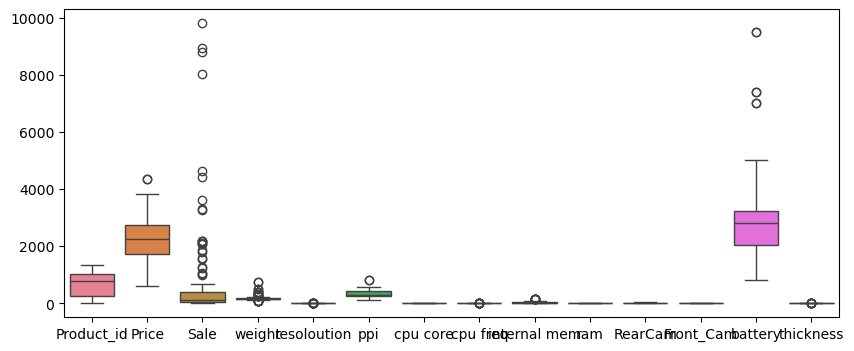

In [62]:
plt.figure(figsize=(10,4))
sns.boxplot(mobile_df)
plt.show()

In [64]:
mobile_df1 = mobile_df.copy()
Q1 = mobile_df1.quantile(0.25)
Q3 =mobile_df1.quantile(0.75)
IQR= Q3-Q1
LP = Q1-1.5*IQR
UP=Q3+1.5*IQR
mobile_df1=mobile_df1[(mobile_df1>=LP) &(mobile_df1<=UP)]

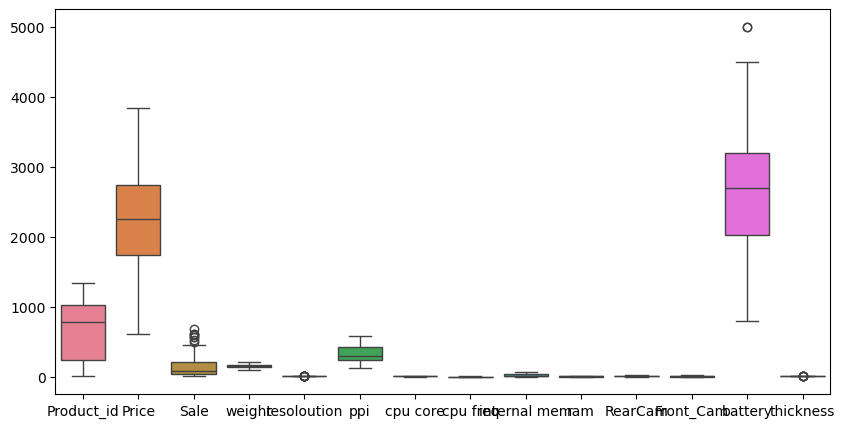

In [66]:
plt.figure(figsize=(10,5))
sns.boxplot(mobile_df1)
plt.show()